# Handwriting Recognition using K-Means
The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

ATMs can recognize handwritten bank checks
Evernote can recognize handwritten task lists
Expensify can recognize handwritten receipts
But how do they do it?

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [4]:
# load data
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
# look at the data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
# look at targets
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

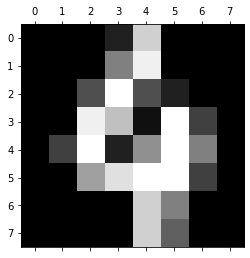

In [9]:
# visualise a datapoint
plt.gray() 
plt.matshow(digits.images[100])
 
plt.show()

In [10]:
# check what it is 
print(digits.target[100])

4


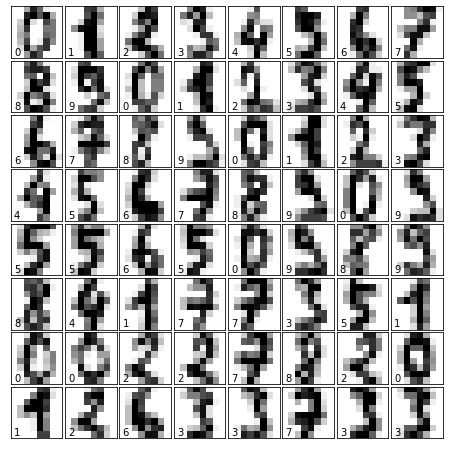

In [12]:
# plot all 64 images

# Figure size (width, height)
 
fig = plt.figure(figsize=(6, 6))
 
# Adjust the subplots 
 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
# For each of the 64 images
 
for i in range(64):
 
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
 
    # Display an image at the i-th position
 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
 
    # Label the image with the target value
 
    ax.text(0, 7, str(digits.target[i]))
 
plt.show()

## K-Means Clustering

There are 10 digits and so there will be 10 clusters. However, for interest I'll run a test to see what happens to accuracy with higher k: 

In [67]:
# define function to find best k
def find_k(data, k):
    # create lists
    num_clusters = list(range(1, (k+1)))
    inertias = []

    # calc K-means for each number of clusters
    for num in num_clusters:
        kmean = KMeans(n_clusters = num)
        kmean.fit(data)
        # calc inertia
        inertias.append([k, kmean.inertia_])

    # plot
    # create y values
    y_val = [x[1] for x in inertias]
    
    plt.plot(num_clusters, y_val, '-o')
    
    plt.title('Inertia plot')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
 
    plt.show()
    
    # sort and print best values
    # print out best 3
    inertias_sorted = sorted(inertias, key=lambda x : x[1], reverse=False)
    print('Lowest inertia: {:.3f} at k= {}'.format(inertias_sorted[0][1], inertias_sorted[0][0]))

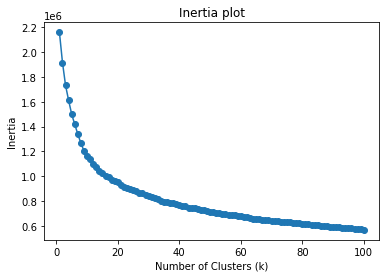

Lowest inertia: 567184.950 at k= 100


In [68]:
find_k(digits.data, 100)

So, k accuracy improves but not to any great degree, and there's never a clear elbow. I'll train with k=10 now:

In [86]:
# train model using k
kmean = KMeans(n_clusters = 10)
kmean.fit(digits.data)
kmean.inertia_

1165760.3769053381

## Visualizing after K-Means

for loop below from CA. Note:
1. sckitlearn calls centroids cluster_centers_
2. The cluster centers should be a list with 64 values (0-16). Here, we are making each of the cluster centers into an 8x8 2D array.

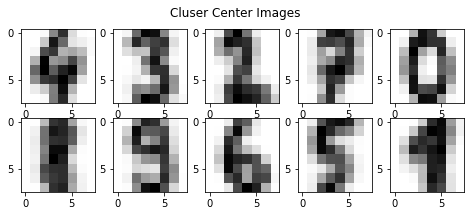

In [70]:
fig = plt.figure(figsize=(8, 3))
plt.suptitle('Cluser Center Images')

             
for i in range(10):
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
  # Display images
  ax.imshow(kmean.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

### Make prediction

Prediction using images drawn in codeacademy. Arrays:

In [71]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.68,4.42,4.27,2.82,0.00,0.00,0.00,0.00,6.03,7.17,7.09,7.62,2.82,0.00,0.00,0.00,0.84,0.54,0.08,6.33,5.95,0.00,0.00,0.00,0.00,0.00,0.00,4.65,6.86,0.00,0.00,0.00,0.00,0.00,1.22,7.17,5.34,0.00,0.00,0.00,3.82,6.25,7.55,7.62,7.17,6.79,0.99,0.00,2.75,5.11,5.41,6.10,4.80,3.74,0.38],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.37,3.81,3.81,3.44,0.46,0.00,0.00,0.00,4.12,7.40,6.94,7.63,5.56,0.00,0.00,0.00,0.00,0.00,0.00,3.43,7.62,2.14,0.00,0.00,0.00,0.00,0.00,0.46,7.62,3.81,0.00,0.00,1.60,2.75,4.11,6.41,7.55,2.52,0.00,0.00,6.64,7.62,7.62,7.62,7.62,7.62,1.30,0.00,0.54,1.53,2.14,2.36,3.05,2.97,0.23,0.00],
[0.00,0.00,0.00,1.60,0.69,0.00,0.00,0.00,0.00,0.00,0.61,7.32,3.81,0.00,0.00,0.00,0.00,0.00,4.04,7.55,1.45,0.00,0.00,0.00,0.00,1.22,7.40,5.04,0.00,0.00,0.00,0.00,0.00,5.64,7.02,0.61,2.29,4.35,0.00,0.00,2.29,7.62,3.13,0.00,6.48,6.10,0.00,0.31,4.42,7.62,6.25,6.18,7.62,6.86,6.33,7.32,1.83,4.57,4.57,4.88,7.62,5.49,4.57,4.04],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.59,3.81,3.81,3.35,1.22,0.00,0.00,4.65,7.62,7.09,7.17,7.62,7.55,0.61,0.00,7.63,4.88,0.15,0.00,4.96,7.63,0.08,0.00,6.41,7.02,3.13,4.80,7.63,4.58,0.00,0.00,2.29,7.62,7.62,7.62,7.32,1.22,0.00,0.00,2.97,7.62,5.80,5.11,7.62,5.19,0.00,0.00,0.46,5.87,7.62,7.62,7.55,3.51,0.00,0.00]
])

In [72]:
new_labels = kmean.predict(new_samples)

In [73]:
# map label indices to actual digits

for i in range(len(new_labels)):
    if new_labels[i] == 0:
        print(0, end='')
    elif new_labels[i] == 1:
        print(9, end='')
    elif new_labels[i] == 2:
        print(2, end='')
    elif new_labels[i] == 3:
        print(1, end='')
    elif new_labels[i] == 4:
        print(6, end='')
    elif new_labels[i] == 5:
        print(8, end='')
    elif new_labels[i] == 6:
        print(4, end='')
    elif new_labels[i] == 7:
        print(5, end='')
    elif new_labels[i] == 8:
        print(7, end='')
    elif new_labels[i] == 9:
        print(3, end='')

2250

Actually 2240, but we know the accuracy isn't good!